Coordinate descent is optimal for the lasso problem. Here we will compare the convergence rate of Gradient Descent vs Coordinate Descent.

First initialize our problem:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

np.random.seed(42)
n, p = 100, 200
X = np.random.randn(n, p)

beta = np.ones((p,))
eps = np.random.normal(size=(n,))
y = X@beta + eps
lmbda_max = np.linalg.norm(X.T @ y, ord=np.inf)

niter = 1000

Now we will use CVX to solve the lasso objective, resulting in the optimal $\theta$:

In [198]:
theta = cp.Variable(p)
lasso_objective = cp.Minimize(0.5 * cp.sum_squares(X @ theta - y) + l * cp.norm1(theta))
problem = cp.Problem(lasso_objective)
problem.solve()
theta_hat = theta.value

Run Gradient descent with a fixed step size $t$:

In [199]:
gd_theta = np.zeros(p)
gd_errors = []
t = 0.0001

for k in range(niter):
    gradient = -X.T @ (y - X @ gd_theta) + l * np.sign(gd_theta)
    gd_theta -= t*gradient
    error = np.linalg.norm(gd_theta - theta_hat)
    gd_errors.append(np.log(error))

Now for the same objective, we will run Coordinate Descent with soft thresholding.

In [200]:
cd_theta = np.zeros(p)
cd_errors = []
for k in range(niter):
    for j in range(p):
        rho = X[:, j].T @ (y - X @ cd_theta + X[:, j] * cd_theta[j])
        if rho < -l:
            cd_theta[j] = (rho + l) / (X[:, j].T @ X[:, j])
        elif rho > l:
            cd_theta[j] = (rho - l) / (X[:, j].T @ X[:, j])
        else:
            cd_theta[j] = 0
    error = np.linalg.norm(cd_theta - theta_hat)
    cd_errors.append(np.log(error))

Below, we plot the results for a single $\lambda$ to compare convergence rates of CD and GD.

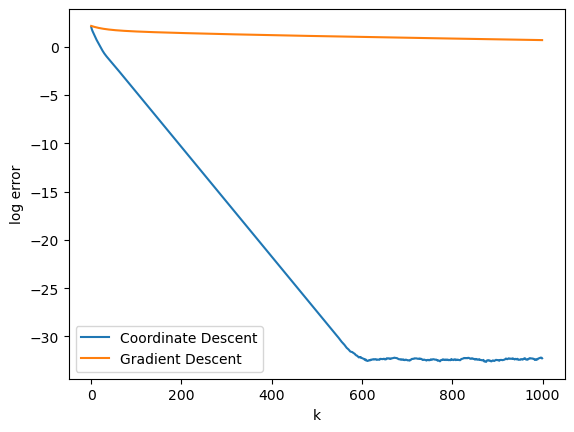

In [201]:
plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
plt.xlabel('k')
plt.ylabel('log error')
plt.legend()
plt.show()

As you can see, the log error for coordinate descent decreases at a faster rate of iterations than gradient descent for the lasso problem. But to futher illustrate the point, we now will compare convergence for multiple values of $\lambda$.

Now re-run the experiment with a sparse y:

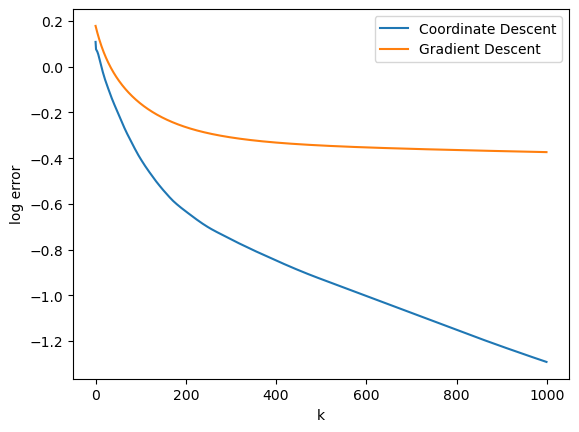

In [202]:
np.random.seed(42)
n, p = 100, 200
X = np.random.randn(n, p)
y = np.random.randn(n)
l = 0.1
true_theta = np.zeros(p)
true_theta[::10] = np.random.randn(p // 10)

lmbda_max = np.linalg.norm(X.T @ y, ord=np.inf)

niter = 1000

theta = cp.Variable(p)
lasso_objective = cp.Minimize(0.5 * cp.sum_squares(X @ theta - y) + l * cp.norm1(theta))
problem = cp.Problem(lasso_objective)
problem.solve()
theta_hat = theta.value

gd_theta = np.zeros(p)
gd_errors = []
t = 0.0001

for k in range(niter):
    gradient = -X.T @ (y - X @ gd_theta) + l * np.sign(gd_theta)
    gd_theta -= t*gradient
    error = np.linalg.norm(gd_theta - theta_hat)
    gd_errors.append(np.log(error))

cd_theta = np.zeros(p)
cd_errors = []
for k in range(niter):
    for j in range(p):
        rho = X[:, j].T @ (y - X @ cd_theta + X[:, j] * cd_theta[j])
        if rho < -l:
            cd_theta[j] = (rho + l) / (X[:, j].T @ X[:, j])
        elif rho > l:
            cd_theta[j] = (rho - l) / (X[:, j].T @ X[:, j])
        else:
            cd_theta[j] = 0
    error = np.linalg.norm(cd_theta - theta_hat)
    cd_errors.append(np.log(error))

    
plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
plt.xlabel('k')
plt.ylabel('log error')
plt.legend()
plt.show()

Now, repeat the experiment for a random y

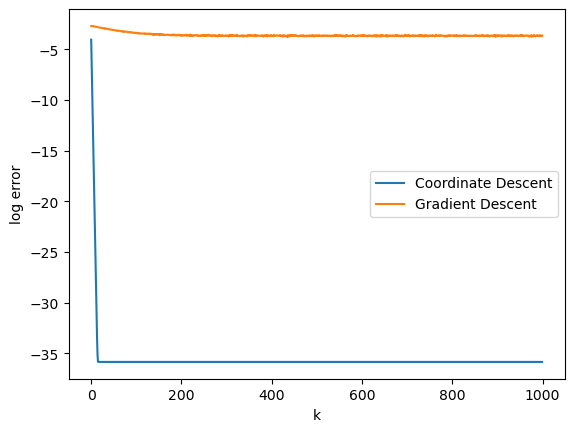

In [203]:
y = np.random.randn(n)

lmbda_max = np.linalg.norm(X.T @ y, ord=np.inf)
l = lmbda_max*0.8

niter = 1000

theta = cp.Variable(p)
lasso_objective = cp.Minimize(0.5 * cp.sum_squares(X @ theta - y) + l * cp.norm1(theta))
problem = cp.Problem(lasso_objective)
problem.solve()
theta_hat = theta.value

gd_theta = np.zeros(p)
gd_errors = []
t = 0.0001

for k in range(niter):
    gradient = -X.T @ (y - X @ gd_theta) + l * np.sign(gd_theta)
    gd_theta -= t*gradient
    error = np.linalg.norm(gd_theta - theta_hat)
    gd_errors.append(np.log(error))

cd_theta = np.zeros(p)
cd_errors = []
for k in range(niter):
    for j in range(p):
        rho = X[:, j].T @ (y - X @ cd_theta + X[:, j] * cd_theta[j])
        if rho < -l:
            cd_theta[j] = (rho + l) / (X[:, j].T @ X[:, j])
        elif rho > l:
            cd_theta[j] = (rho - l) / (X[:, j].T @ X[:, j])
        else:
            cd_theta[j] = 0
    error = np.linalg.norm(cd_theta - theta_hat)
    cd_errors.append(np.log(error))

    
plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
plt.xlabel('k')
plt.ylabel('log error')
plt.legend()
plt.show()